# analyse exploratoire des données (EDA) 

Chargement des données et la conversion en DataFrames

In [4]:
import json 
import pandas as pd 

with open('users_transactions_with_issues (2).json', 'r') as file:
    data = json.load(file)

# Conversion en DataFrames pour faciliter l'analyse exploratoire
df_users = pd.DataFrame(data['users'])
df_transactions = pd.DataFrame(data['transactions'])

# Affichage des premiers enregistrements
print("Aperçu des utilisateurs:")
display(df_users.head())
print("\nAperçu des transactions:")
display(df_transactions.head())

Aperçu des utilisateurs:


,_id,first_name,last_name,email,gender,phone,transactions
0,u1,Patricia,Rivers,moorechristopher@example.net,Other,473.326.7799,"[t124, t1411]"
1,u2,Rebekah,Watts,johnathandixon@example.org,None,+1-841-910-0552x738,"[t67, t289, t491, t1156]"
2,u3,Glenn,Costa,fthornton@example.net,Female,+12345678901234567890,[t1486]
3,u4,Terrance,Vargas,johnhawkins@example.com,Male,+1-662-899-0028x36983,"[t1007, t2517]"
4,u5,Christy,Martinez,donna87@example.org,Unknown,(455)402-6899x27376,"[t1745, t2236]"



Aperçu des transactions:


,_id,user_id,amount,timestamp,status
0,t1,u16,483.22,2024-10-24T15:41:56.024309,SUCCESS
1,t2,u247,-17.64,2024-12-05T15:41:56.024344,None
2,t3,u484,18.73,2024-11-17T15:41:56.024359,FAILED
3,t4,u403,127.74,2024-11-12T15:41:56.024369,FAILED
4,t5,u604,384.01,2024-11-02T15:41:56.024378,Invalid


Analyse exploratoire Statistiques Basique 

In [7]:
print("Statistiques sur les utilisateurs:")
print(f"Nombre total d'utilisateurs: {len(df_users)}")
print(f"Valeurs manquantes:\n{df_users.isnull().sum()}")


Statistiques sur les utilisateurs:
Nombre total d'utilisateurs: 1000
Valeurs manquantes:
_id             0
first_name      0
last_name       0
email           0
gender          0
phone           0
transactions    0
dtype: int64


In [8]:
print("\nStatistiques sur les transactions:")
print(f"Nombre total de transactions: {len(df_transactions)}")
print(f"Valeurs manquantes:\n{df_transactions.isnull().sum()}")


Statistiques sur les transactions:
Nombre total de transactions: 3005
Valeurs manquantes:
_id           0
user_id       0
amount       41
timestamp    48
status       46
dtype: int64


## Analyse de la collection Users

In [9]:
print("=== ANALYSE DE LA COLLECTION USERS ===\n")
print("Structure du DataFrame users:")
print(df_users.info())

=== ANALYSE DE LA COLLECTION USERS ===

Structure du DataFrame users:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   _id           1000 non-null   object
 1   first_name    1000 non-null   object
 2   last_name     1000 non-null   object
 3   email         1000 non-null   object
 4   gender        1000 non-null   object
 5   phone         1000 non-null   object
 6   transactions  1000 non-null   object
dtypes: object(7)
memory usage: 54.8+ KB
None


In [10]:
print("\nStatistiques descriptives:")
print(df_users.describe(include='all'))



Statistiques descriptives:
          _id first_name last_name             email gender           phone  \
count    1000       1000      1000              1000   1000            1000   
unique   1000        403       530               941      6             904   
top     u1000    Michael     Smith  invalidemail.com   None  abcd-efgh-ijkl   
freq        1         22        25                22    182              28   

       transactions  
count          1000  
unique          944  
top              []  
freq             57  


In [11]:
print("\nValeurs manquantes par colonne:")
missing_users = df_users.isnull().sum()
print(missing_users)


Valeurs manquantes par colonne:
_id             0
first_name      0
last_name       0
email           0
gender          0
phone           0
transactions    0
dtype: int64


In [12]:
# Analyse des colonnes spécifiques
print("\nDistribution des genres:")
print(df_users['gender'].value_counts())
print("\nPourcentage:", df_users['gender'].value_counts(normalize=True))


Distribution des genres:
gender
None       182
Other      178
Unknown    170
Male       161
123        161
Female     148
Name: count, dtype: int64

Pourcentage: gender
None       0.182
Other      0.178
Unknown    0.170
Male       0.161
123        0.161
Female     0.148
Name: proportion, dtype: float64


In [15]:
print("\nAnalyse des emails:")
print("Nombre d'emails uniques:", df_users['email'].nunique())
print("Exemple des 10 premiers emails:")
print(df_users['email'].head(10))


Analyse des emails:
Nombre d'emails uniques: 941
Exemple des 10 premiers emails:
0    moorechristopher@example.net
1      johnathandixon@example.org
2           fthornton@example.net
3         johnhawkins@example.com
4             donna87@example.org
5             debra77@example.net
6     kathrynmckinney@example.net
7             jamie83@example.com
8    samanthastephens@example.org
9           graydebra@example.net
Name: email, dtype: object


In [16]:
# Analyse des numéros de téléphone
print("\nAnalyse des numéros de téléphone:")
print("Format des numéros (premiers exemples):")
print(df_users['phone'].head())
phone_lengths = df_users['phone'].str.len()
print("\nLongueur des numéros de téléphone:")
print(phone_lengths.value_counts().sort_index())


Analyse des numéros de téléphone:
Format des numéros (premiers exemples):
0             473.326.7799
1      +1-841-910-0552x738
2    +12345678901234567890
3    +1-662-899-0028x36983
4      (455)402-6899x27376
Name: phone, dtype: object

Longueur des numéros de téléphone:
phone
0      24
7      21
10     73
12    130
13     76
14     28
15     30
16    112
17    125
18    104
19     62
20     93
21     90
22     32
Name: count, dtype: int64


## Analyse de la collection Transactions

In [17]:
print("=== ANALYSE DE LA COLLECTION TRANSACTIONS ===\n")
print("Structure du DataFrame transactions:")
print(df_transactions.info())

=== ANALYSE DE LA COLLECTION TRANSACTIONS ===

Structure du DataFrame transactions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3005 entries, 0 to 3004
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   _id        3005 non-null   object 
 1   user_id    3005 non-null   object 
 2   amount     2964 non-null   float64
 3   timestamp  2957 non-null   object 
 4   status     2959 non-null   object 
dtypes: float64(1), object(4)
memory usage: 117.5+ KB
None


In [19]:
print("\nValeurs manquantes par colonne:")
missing_transactions = df_transactions.isnull().sum()
print(missing_transactions)


Valeurs manquantes par colonne:
_id           0
user_id       0
amount       41
timestamp    48
status       46
dtype: int64


In [20]:
# Analyse des montants
print("\nAnalyse des montants:")
print("Statistiques des montants:")
print(df_transactions['amount'].describe())
print("\nNombre de montants négatifs:", (df_transactions['amount'] < 0).sum())
print("Nombre de montants nuls:", (df_transactions['amount'] == 0).sum())


Analyse des montants:
Statistiques des montants:
count    2964.000000
mean      205.267777
std       190.952926
min      -498.540000
25%        64.520000
50%       216.520000
75%       362.065000
max       499.460000
Name: amount, dtype: float64

Nombre de montants négatifs: 398
Nombre de montants nuls: 0


In [21]:
# Analyse des status
print("\nDistribution des status:")
print(df_transactions['status'].value_counts())
print("\nPourcentage:", df_transactions['status'].value_counts(normalize=True))


Distribution des status:
status
SUCCESS    622
123        499
None       483
PENDING    468
Invalid    453
FAILED     434
Name: count, dtype: int64

Pourcentage: status
SUCCESS    0.210206
123        0.168638
None       0.163231
PENDING    0.158162
Invalid    0.153092
FAILED     0.146671
Name: proportion, dtype: float64


In [22]:
# Analyse temporelle
df_transactions['timestamp'] = pd.to_datetime(df_transactions['timestamp'])
print("\nPériode couverte:")
print("Début:", df_transactions['timestamp'].min())
print("Fin:", df_transactions['timestamp'].max())


Période couverte:
Début: 2024-10-19 15:41:56.024692
Fin: 2025-02-16 15:41:56.047249


## Analyse des relations entre Users et Transactions

In [23]:
# Nombre de transactions par utilisateur
tx_per_user = df_transactions.groupby('user_id').size()
print("Statistiques du nombre de transactions par utilisateur:")
print(tx_per_user.describe())


Statistiques du nombre de transactions par utilisateur:
count    940.000000
mean       3.196809
std        5.089046
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max      151.000000
dtype: float64


In [24]:
# Vérification des user_id invalides
users_with_tx = set(df_transactions['user_id'])
all_users = set(df_users['_id'])
invalid_users = users_with_tx - all_users
print("\nNombre de user_id invalides:", len(invalid_users))
if len(invalid_users) > 0:
    print("Exemples de user_id invalides:", list(invalid_users)[:5])



Nombre de user_id invalides: 1
Exemples de user_id invalides: ['u9999']


In [25]:
# Distribution des montants par genre
df_merged = df_transactions.merge(df_users, left_on='user_id', right_on='_id')
print("\nMontant moyen des transactions par genre:")
print(df_merged.groupby('gender')['amount'].mean())


Montant moyen des transactions par genre:
gender
123        206.230969
Female     203.886873
Male       221.448249
None       197.100963
Other      201.967764
Unknown    199.869544
Name: amount, dtype: float64


## Visualisations

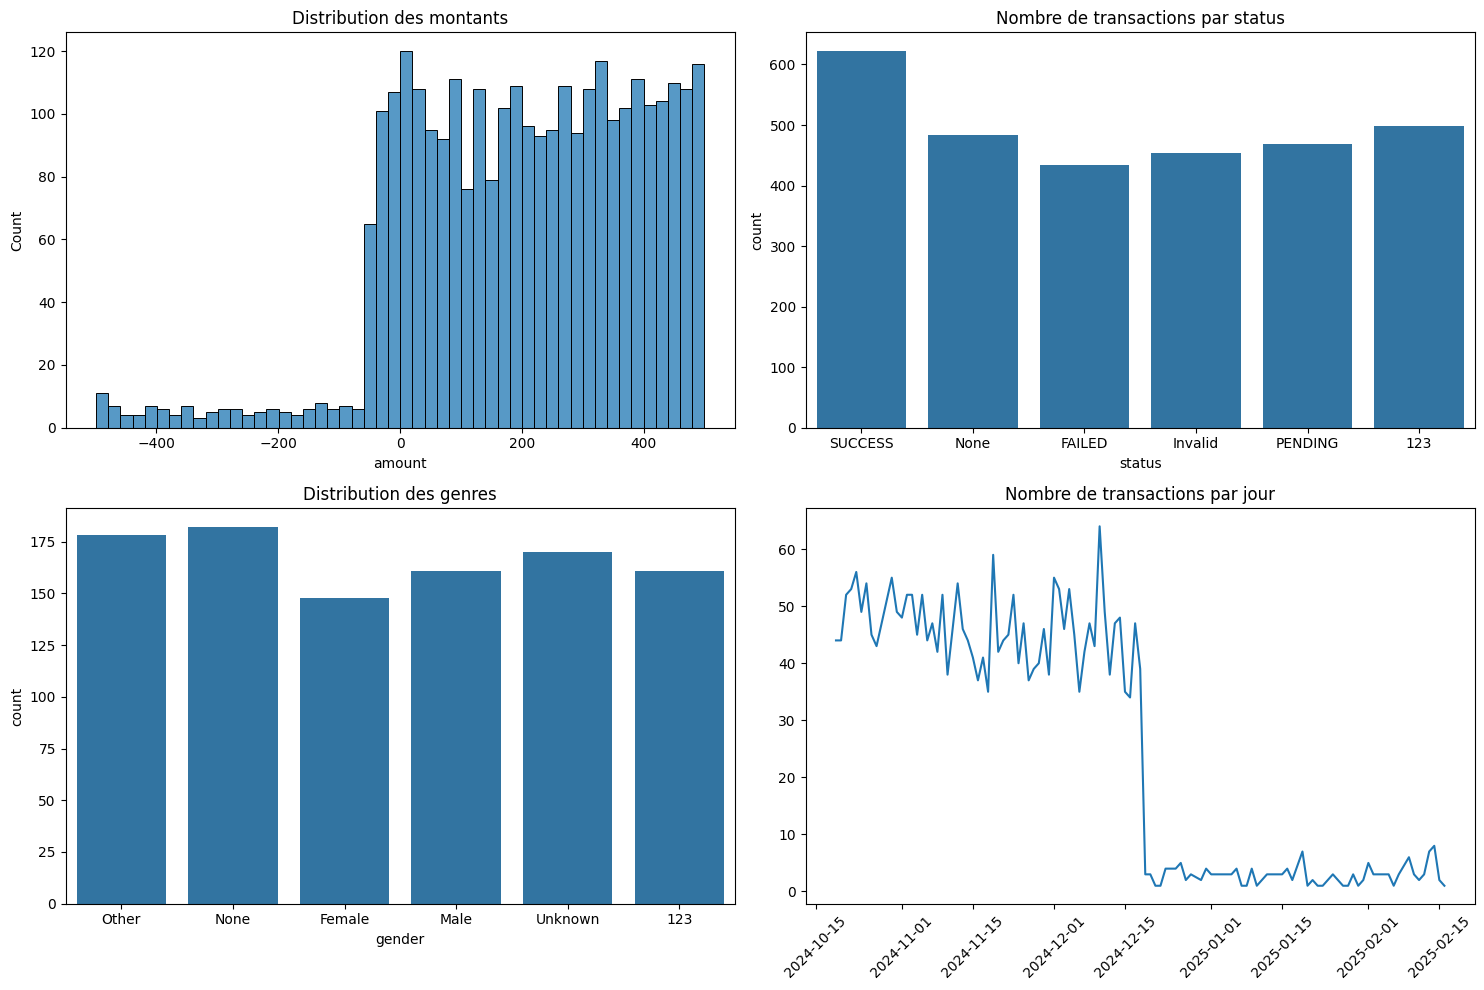

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))

# Distribution des montants
plt.subplot(2, 2, 1)
sns.histplot(data=df_transactions, x='amount', bins=50)
plt.title('Distribution des montants')

# Transactions par status
plt.subplot(2, 2, 2)
sns.countplot(data=df_transactions, x='status')
plt.title('Nombre de transactions par status')

# Distribution des genres
plt.subplot(2, 2, 3)
sns.countplot(data=df_users, x='gender')
plt.title('Distribution des genres')

# Transactions par jour
plt.subplot(2, 2, 4)
df_transactions['date'] = df_transactions['timestamp'].dt.date
daily_tx = df_transactions.groupby('date').size()
plt.plot(daily_tx.index, daily_tx.values)
plt.title('Nombre de transactions par jour')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

 Analyse des patterns dans les emails

In [28]:
import re 

# Distribution des domaines d'email
email_domains = df_users['email'].str.split('@').str[1]
print("Top 20 des domaines d'email:")
print(email_domains.value_counts().head(20))

# Patterns d'emails invalides
def analyze_email_pattern(email):
    if pd.isna(email):
        return 'missing'
    if '@' not in email:
        return 'no_at_symbol'
    if '.' not in email:
        return 'no_domain'
    if not re.match(r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$', email):
        return 'invalid_format'
    return 'valid'

email_patterns = df_users['email'].apply(analyze_email_pattern)
print("\nTypes d'erreurs dans les emails:")
print(email_patterns.value_counts())

Top 20 des domaines d'email:
email
example.net       325
example.org       302
example.com       286
domain             21
.com               17
site                2
thing               1
threat              1
million             1
travel              1
research            1
alone               1
administration      1
our                 1
than                1
whose               1
away                1
send                1
wall                1
day                 1
Name: count, dtype: int64

Types d'erreurs dans les emails:
email
valid             913
no_domain          48
no_at_symbol       22
invalid_format     17
Name: count, dtype: int64


Analyse des numéros de téléphone

In [29]:
# Patterns de début de numéro
phone_prefixes = df_users['phone'].str[:4].value_counts()
print("Préfixes les plus courants:")
print(phone_prefixes.head())

# Analyse des caractères spéciaux
special_chars = df_users['phone'].str.findall(r'[^0-9+]').str.len()
print("\nNombre de caractères spéciaux par numéro:")
print(special_chars.value_counts())

# Conformité au format algérien
algerian_format = df_users['phone'].str.match(r'^\+213[0-9]{9}$')
print("\nConformité au format algérien (+213):")
print(f"Conformes: {algerian_format.sum()}")
print(f"Non conformes: {len(algerian_format) - algerian_format.sum()}")

Préfixes les plus courants:
phone
001-    144
abcd     28
+123     27
+1-6     24
         24
Name: count, dtype: int64

Nombre de caractères spéciaux par numéro:
phone
3     374
4     323
0     145
2     130
14     28
Name: count, dtype: int64

Conformité au format algérien (+213):
Conformes: 0
Non conformes: 1000


 Analyse temporelle des transactions

In [30]:
df_merged = df_transactions.merge(df_users, left_on='user_id', right_on='_id')

print("=== ANALYSE DES CORRÉLATIONS ET PATTERNS ===\n")

# Relation entre genre et montant
gender_amount_stats = df_merged.groupby('gender')['amount'].agg(['mean', 'median', 'std', 'count'])
print("Statistiques des montants par genre:")
print(gender_amount_stats)

# Status des transactions par genre
gender_status_cross = pd.crosstab(df_merged['gender'], df_merged['status'])
print("\nDistribution des status par genre:")
print(gender_status_cross)

# Analyse temporelle par genre
df_merged['hour'] = pd.to_datetime(df_merged['timestamp']).dt.hour
gender_hour_cross = pd.crosstab(df_merged['gender'], df_merged['hour'])
print("\nDistribution horaire des transactions par genre:")
print(gender_hour_cross)

=== ANALYSE DES CORRÉLATIONS ET PATTERNS ===

Statistiques des montants par genre:
               mean   median         std  count
gender                                         
123      206.230969  210.985  186.555357    454
Female   203.886873  224.210  190.954247    403
Male     221.448249  229.840  179.814291    434
None     197.100963  206.175  200.210217    540
Other    201.967764  204.460  197.191358    501
Unknown  199.869544  212.155  189.881444    482

Distribution des status par genre:
status   123  FAILED  Invalid  None  PENDING  SUCCESS
gender                                               
123       89      64       66    73       71       92
Female    59      63       63    70       62       87
Male      71      69       72    78       60       89
None      88      81       82    83       87      116
Other     91      69       80    82       77       96
Unknown   80      73       65    77       78      107

Distribution horaire des transactions par genre:
hour     15.0
g

Analyse des comportements utilisateurs

In [31]:
print("=== ANALYSE DES COMPORTEMENTS UTILISATEURS ===\n")

# Fréquence des transactions
user_tx_freq = df_transactions.groupby('user_id').size()
print("Statistiques de fréquence des transactions:")
print(user_tx_freq.describe())

# Montants moyens par utilisateur
user_avg_amount = df_transactions.groupby('user_id')['amount'].mean()
print("\nStatistiques des montants moyens par utilisateur:")
print(user_avg_amount.describe())

# Identification des utilisateurs avec comportements atypiques
high_value_users = user_avg_amount[user_avg_amount > user_avg_amount.quantile(0.95)]
print("\nUtilisateurs avec des montants moyens élevés (top 5%):")
print(high_value_users.head())

=== ANALYSE DES COMPORTEMENTS UTILISATEURS ===

Statistiques de fréquence des transactions:
count    940.000000
mean       3.196809
std        5.089046
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max      151.000000
dtype: float64

Statistiques des montants moyens par utilisateur:
count    939.000000
mean     204.776943
std      128.972356
min     -424.980000
25%      127.488333
50%      214.521667
75%      291.971250
max      499.460000
Name: amount, dtype: float64

Utilisateurs avec des montants moyens élevés (top 5%):
user_id
u107    499.02
u12     419.48
u127    422.48
u135    483.17
u136    449.96
Name: amount, dtype: float64
